In [2]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_excel(r'C:\Users\Shailja Sharma\Downloads\WalmartSales.xlsx',engine='openpyxl')

In [19]:
df['Revenue'] = df['Unit price'] * df['Quantity']

In [28]:
performance = df.groupby(['City', 'Branch']).agg(
    Total_Sales=('Quantity', 'sum'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()

In [40]:
print(performance)

        City Branch  Total_Sales  Total_Revenue
0   Mandalay      A          637       34130.09
1   Mandalay      B          664       37215.93
2   Mandalay      C          519       29794.62
3  Naypyitaw      A          648       35985.64
4  Naypyitaw      B          604       35157.75
5  Naypyitaw      C          579       34160.14
6     Yangon      A          598       33647.27
7     Yangon      B          631       35193.51
8     Yangon      C          630       32302.43


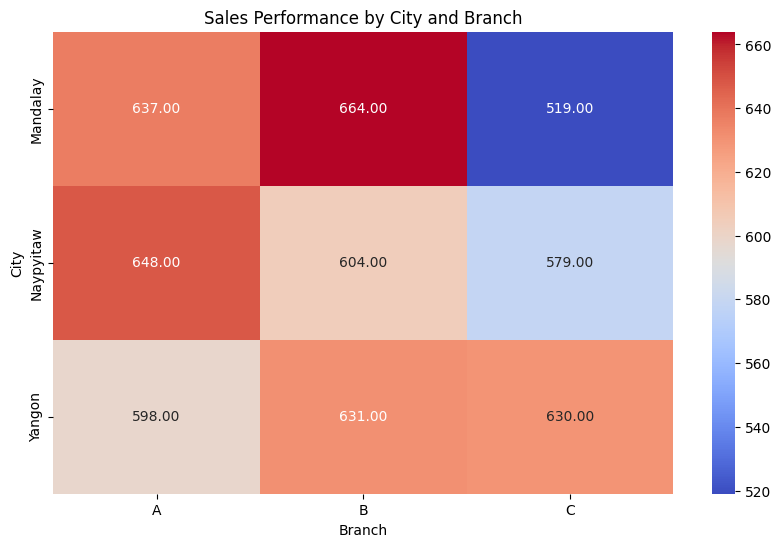

In [31]:
pivot_table =performance.pivot(index='City',columns= 'Branch',values= 'Total_Sales')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Sales Performance by City and Branch')
plt.show()


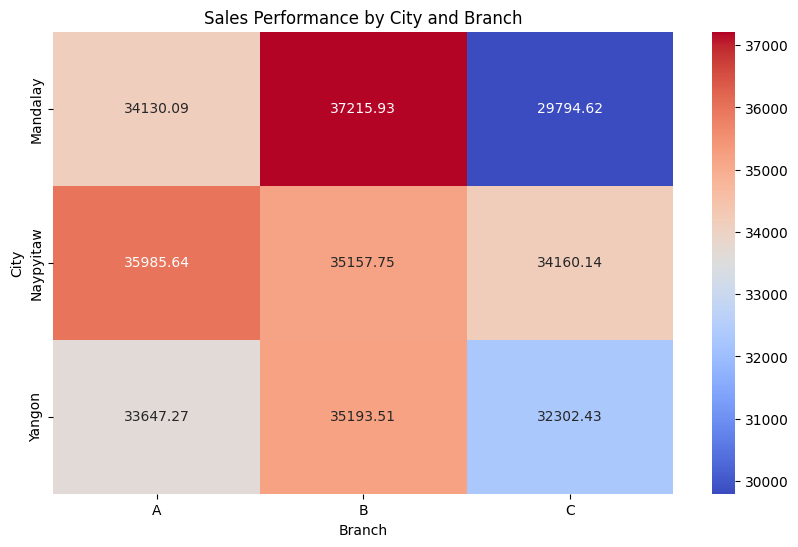

In [32]:
pivot_table =performance.pivot(index='City',columns= 'Branch',values= 'Total_Revenue')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Sales Performance by City and Branch')
plt.show()

In [33]:
df['Average_Price'] = df['Sales'] / df['Quantity']

In [34]:
average_price = df.groupby(['City', 'Branch'])['Average_Price'].mean().reset_index()

In [35]:
print(average_price)

        City Branch  Average_Price
0   Mandalay      A      53.353866
1   Mandalay      B      56.133305
2   Mandalay      C      57.958316
3  Naypyitaw      A      54.123182
4  Naypyitaw      B      57.785688
5  Naypyitaw      C      57.941009
6     Yangon      A      55.639298
7     Yangon      B      56.011062
8     Yangon      C      52.684602


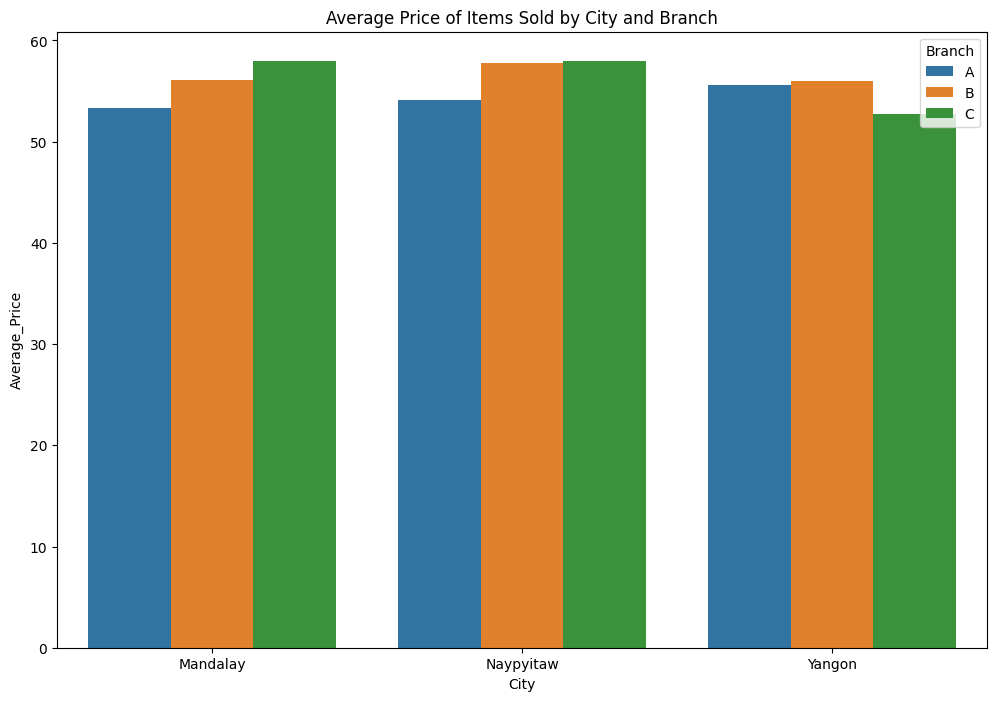

In [77]:
plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='Average_Price', hue='Branch', data=average_price)
plt.title('Average Price of Items Sold by City and Branch')
plt.show()


In [37]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

In [43]:
monthly_product_line = df.groupby(['Month', 'Product line']).agg({
    'Sales': 'sum'
    
}).reset_index()
print(monthly_product_line)

      Month            Product line     Sales
0   2019-01  Electronic accessories  17934.56
1   2019-01     Fashion accessories  18423.92
2   2019-01      Food and beverages  18638.60
3   2019-01       Health and beauty  15603.02
4   2019-01      Home and lifestyle  19518.80
5   2019-01       Sports and travel  20635.26
6   2019-02  Electronic accessories  16536.10
7   2019-02     Fashion accessories  18104.63
8   2019-02      Food and beverages  19047.96
9   2019-02       Health and beauty  13906.91
10  2019-02      Home and lifestyle  11842.27
11  2019-02       Sports and travel  13152.01
12  2019-03  Electronic accessories  17279.37
13  2019-03     Fashion accessories  15191.35
14  2019-03      Food and beverages  15784.72
15  2019-03       Health and beauty  17341.25
16  2019-03      Home and lifestyle  19935.99
17  2019-03       Sports and travel  18710.66


In [44]:
monthly_gender = df.groupby(['Month', 'Gender']).agg({
    'Sales': 'sum'
}).reset_index()
print(monthly_gender)

     Month  Gender     Sales
0  2019-01  Female  56322.84
1  2019-01    Male  54431.32
2  2019-02  Female  53652.91
3  2019-02    Male  38936.97
4  2019-03  Female  49912.75
5  2019-03    Male  54330.59


In [45]:
monthly_payment_method = df.groupby(['Month', 'Payment']).agg({
    'Sales': 'sum'
}).reset_index()
print(monthly_payment_method)

     Month      Payment     Sales
0  2019-01         Cash  39781.03
1  2019-01  Credit card  36425.31
2  2019-01      Ewallet  34547.82
3  2019-02         Cash  34044.13
4  2019-02  Credit card  29866.69
5  2019-02      Ewallet  28679.06
6  2019-03         Cash  33038.24
7  2019-03  Credit card  29676.64
8  2019-03      Ewallet  41528.46


In [46]:
april_2019 = df[df['Month'] == '2019-04']

In [47]:
performance_april = april_2019.groupby(['Product line', 'Gender', 'Payment']).agg({
    'Sales': 'sum'
}).reset_index()

In [48]:
print(performance_april)

Empty DataFrame
Columns: [Product line, Gender, Payment, Sales]
Index: []


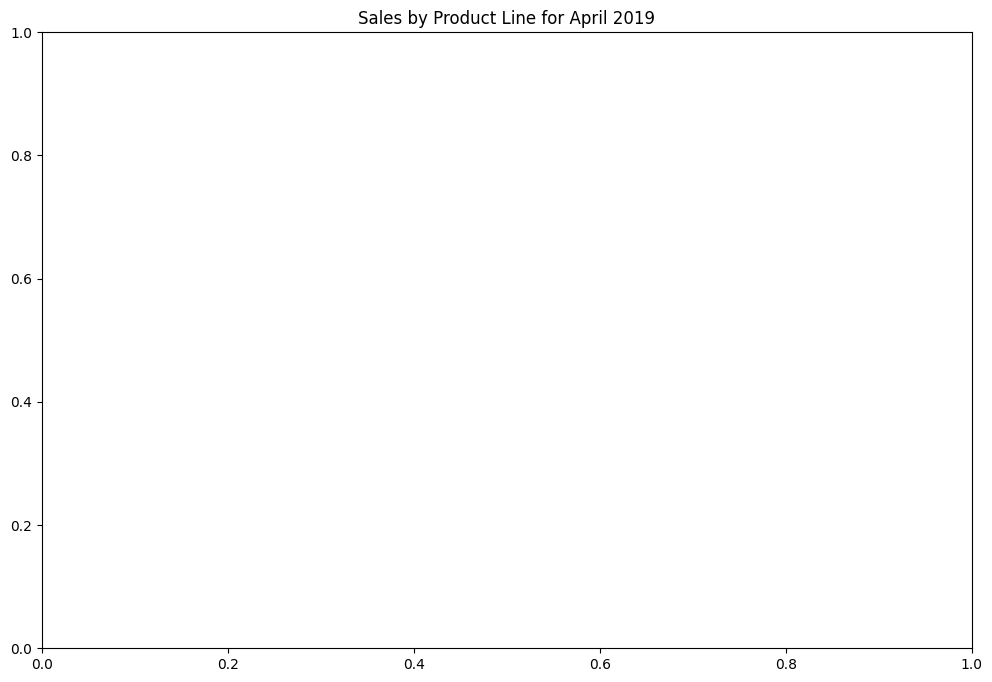

In [49]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Product line', y='Sales', data=performance_april)
plt.title('Sales by Product Line for April 2019')
plt.show()
